In [1]:
from BayesNet import *
from IPython.display import Image

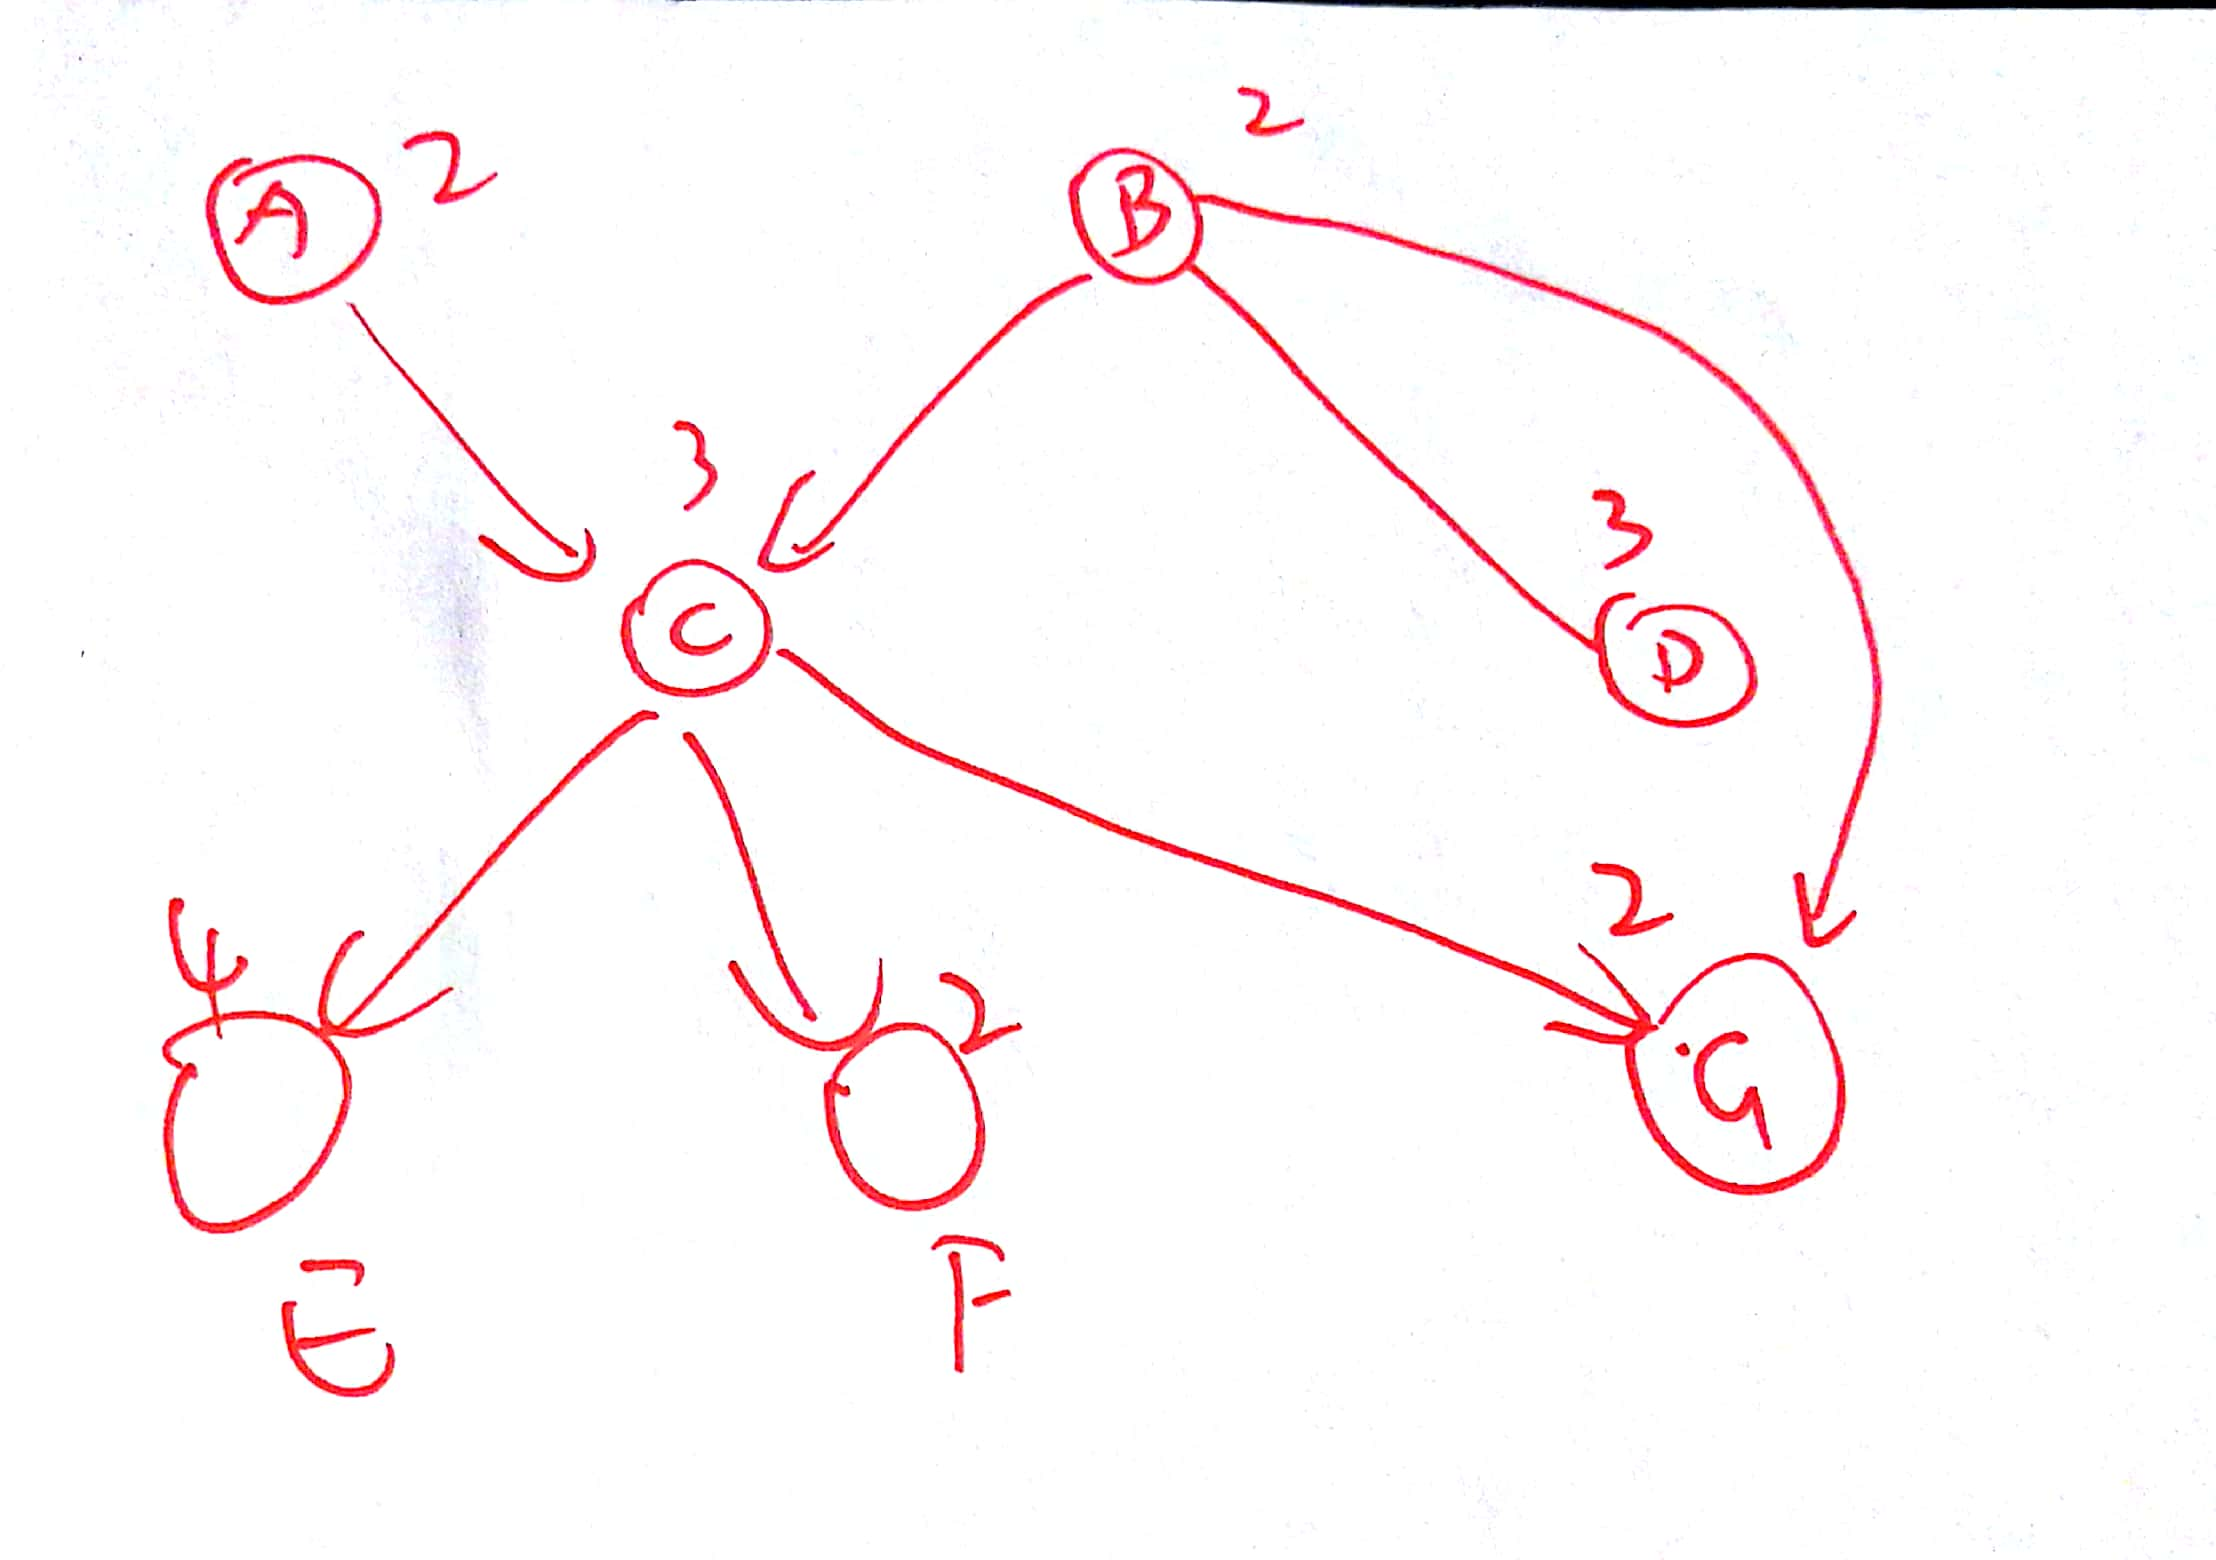

In [2]:
Image('Model1.jpeg', width=500, height=500)

In [3]:
# Defining the model structure. We can define the network by just passing a list of edges.
model1 = BayesianModel([('A', 'C'), ('B', 'C'), ('B', 'D'), ('B', 'G'), ('C', 'E'), ('C', 'F'), ('C', 'G')])

# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | A_0     | A_0     | A_1     | A_1     |
#    +---------+---------+---------+---------+---------+
#    | intel   | B_0     | B_1     | B_0     | B_1     |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.1     | 0.55    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.7     | 0.25    | 0.05    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.2     | 0.2     | 0.05    | 0.2     |
#    +---------+---------+---------+---------+---------+
# Defining individual CPDs.

cpd_a = TabularCPD(variable='A', variable_card=2, values=[[0.6, 0.4]])
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.7, 0.3]])

cpd_c = TabularCPD(variable='C', variable_card=3, 
                   values=[[0.1, 0.55, 0.9,  0.5],
                           [0.7, 0.25, 0.05, 0.3],
                           [0.2, 0.2,  0.05, 0.2]],
                  evidence=['A', 'B'],
                  evidence_card=[2, 2])

cpd_d = TabularCPD(variable='D', variable_card=3, 
                   values=[[0.1, 0.4],
                           [0.4, 0.4],
                           [0.5, 0.2]],
                   evidence=['B'],
                   evidence_card=[2])

cpd_e = TabularCPD(variable='E', variable_card=4,
                   values=[[0.2, 0.1,  0.45],
                           [0.3, 0.36, 0.25],
                           [0.4, 0.44, 0.05],
                           [0.1, 0.1,  0.25]],
                   evidence=['C'],
                   evidence_card=[3])

cpd_f = TabularCPD(variable='F', variable_card=2,
                   values=[[0.2, 0.1, 0.5],
                           [0.8, 0.9, 0.5]],
                   evidence=['C'],
                   evidence_card=[3])

cpd_g = TabularCPD(variable='G', variable_card=2,
                   values=[[0.36, 0.14, 0.35, 0.88, 0.5, 0.29],
                           [0.64, 0.86, 0.65, 0.12, 0.5, 0.71]],
                   evidence=['C', 'B'],
                   evidence_card=[3, 2])
# Associating the CPDs with the network
model1.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d, cpd_e, cpd_f, cpd_g)

In [4]:
infer1 = VariableElimination(model1)

In [5]:
print(infer1.query(['F'], evidence={'A':0}))

   A  F    Prob
0  0  0  0.2035
1  0  1  0.7965


<IPython.core.display.Javascript object>


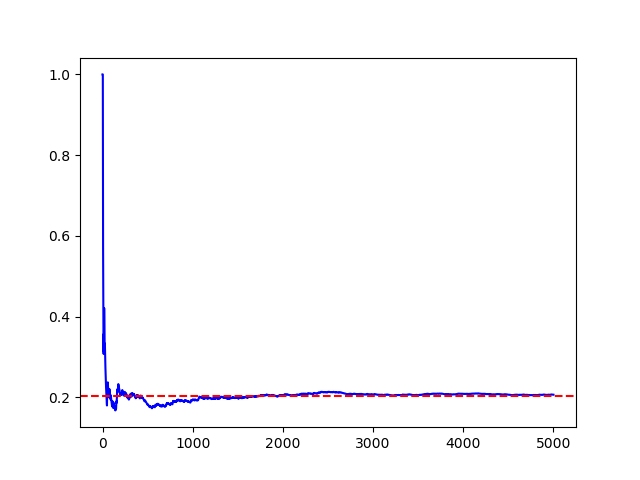

None


In [6]:
%matplotlib notebook

infer_gibbs = GibbsSampling(model1)
print(infer_gibbs.draw(['F'], [0], 5000, 0.2035, burn_in=0, evidence={'A':0}))

In [7]:
print(infer_gibbs.query(['F'], 5000, burn_in=1000, evidence={'A':0}))

   F      Prob
0  0  0.206198
1  1  0.793802


In [8]:
print(infer1.query(['C'], evidence={'G':1, 'D':2}))

   C  G  D      Prob
0  0  1  2  0.473418
1  1  1  2  0.397845
2  2  1  2  0.128737


<IPython.core.display.Javascript object>


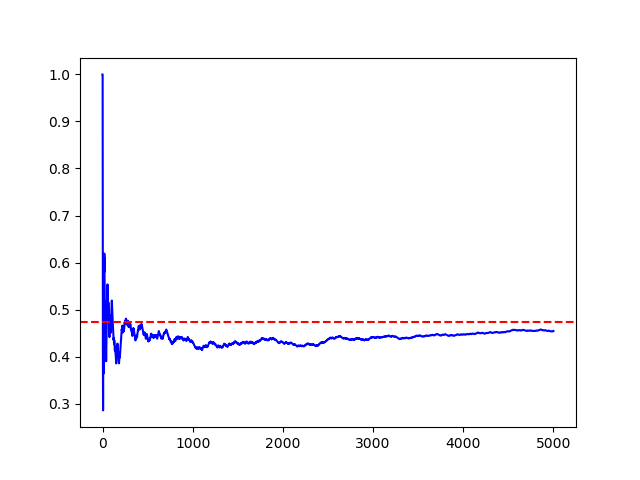

None


In [9]:
%matplotlib notebook
print(infer_gibbs.draw(['C'], [0], 5000, 0.473418, burn_in=0, evidence={'G':1, 'D':2}))

In [10]:
print(infer_gibbs.query(['C'], 5000, burn_in=1000, evidence={'G':1, 'D':2}))

   C      Prob
0  0  0.479380
1  1  0.393902
2  2  0.126718


In [11]:
print(infer1.query(['B'], evidence={'G':1, 'E':3}))

   B  G  E      Prob
0  0  1  3  0.668822
1  1  1  3  0.331178


<IPython.core.display.Javascript object>


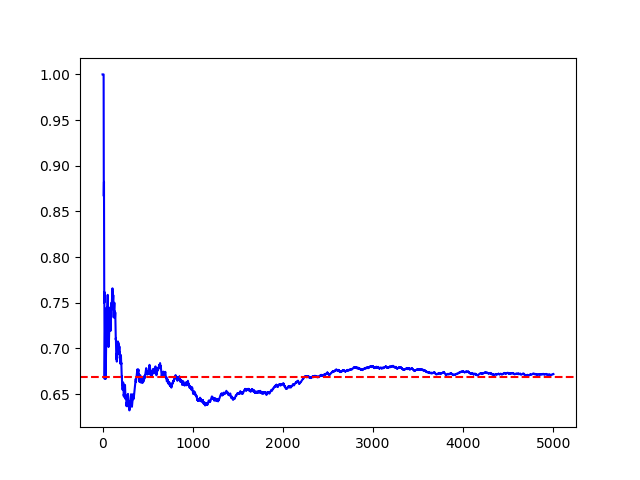

None


In [12]:
%matplotlib notebook
print(infer_gibbs.draw(['B'], [0], 5000, 0.668822, burn_in=0, evidence={'G':1, 'E':3}))

In [13]:
print(infer_gibbs.query(['B'], 5000, burn_in=1000, evidence={'G':1, 'E':3}))

   B      Prob
0  0  0.669083
1  1  0.330917


In [14]:
model = BayesianModel([('valve1', 'valve2'), ('valve2', 'sensor2'), ('valve2', 'valve3'), ('valve3', 'sensor3'), ('valve1', 'sensor1')])
cpd_valve1 = TabularCPD(variable='valve1', variable_card=2, values=[[1,0]])
cpd_v1Tov2 = TabularCPD(variable='valve2', variable_card=2, 
                   values=[[0.8,0],
                           [0.2,1]],
                   evidence=['valve1'],
                   evidence_card=[2])
cpd_v1Tos1 = TabularCPD(variable='sensor1', variable_card=2, 
                   values=[[0.5,0],
                           [0.5,1]],
                   evidence=['valve1'],
                   evidence_card=[2])
cpd_v2Tos2 = TabularCPD(variable='sensor2', variable_card=2, 
                   values=[[0.5,0],
                           [0.5,1]],
                   evidence=['valve2'],
                   evidence_card=[2])
cpd_v2Tov3 = TabularCPD(variable='valve3', variable_card=2, 
                   values=[[0.8,0],
                           [0.2,1]],
                   evidence=['valve2'],
                   evidence_card=[2])
cpd_v3Tos3 = TabularCPD(variable='sensor3', variable_card=2, 
                   values=[[0.5,0],
                           [0.5,1]],
                   evidence=['valve3'],
                   evidence_card=[2])
model.add_cpds(cpd_v1Tos1, cpd_v2Tos2, cpd_v3Tos3, cpd_v1Tov2, cpd_v2Tov3, cpd_valve1)

In [15]:
infer_gibbs2 = GibbsSampling(model)

In [17]:
print(infer_gibbs2.query(['valve3'], 5000, burn_in=1000))

   valve3      Prob
0       0  0.643089
1       1  0.356911


<IPython.core.display.Javascript object>


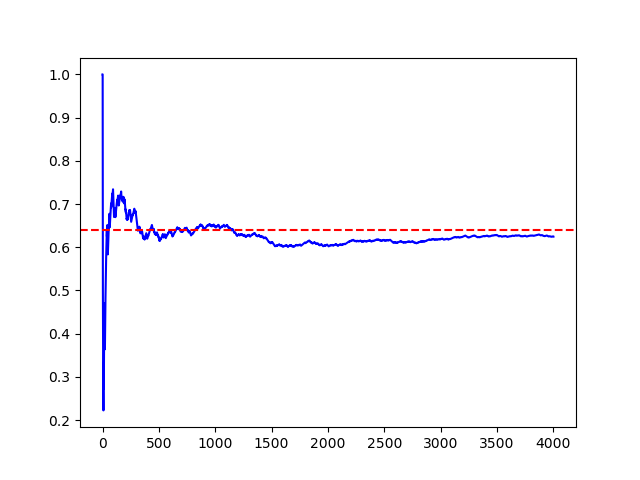

None


In [18]:
%matplotlib notebook
print(infer_gibbs2.draw(['valve3'], [0], 5000, 0.64, burn_in=1000))

In [19]:
print(infer_gibbs2.query(['valve3'], 5000, burn_in=1000, evidence={'sensor2': 1}))

   valve3      Prob
0       0  0.539365
1       1  0.460635


<IPython.core.display.Javascript object>


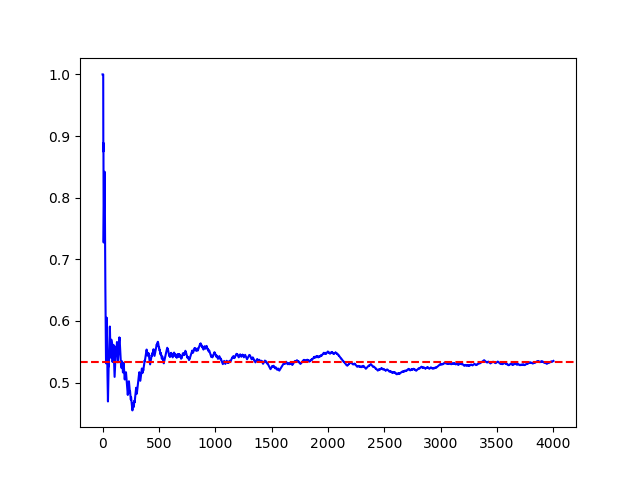

None


In [20]:
%matplotlib notebook
print(infer_gibbs2.draw(['valve3'], [0], 5000, 0.5333, burn_in=1000, evidence={'sensor2': 1}))

In [21]:
print(infer_gibbs2.query(['valve3'], 5000, burn_in=1000, evidence={'sensor1': 1,'sensor2': 0, 'sensor3': 1}))

   valve3      Prob
0       0  0.661585
1       1  0.338415


<IPython.core.display.Javascript object>


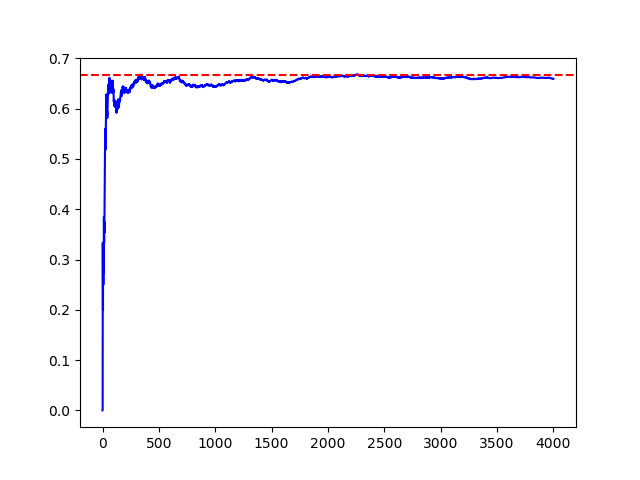

None


In [22]:
%matplotlib notebook
print(infer_gibbs2.draw(['valve3'], [0], 5000, 0.6667, burn_in=1000, evidence={'sensor1': 1,'sensor2': 0, 'sensor3': 1}))